In [ ]:
#Importamos librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import kagglehub

## importamos el dataset

In [ ]:
#Descargarmos el dataset
path = kagglehub.dataset_download("neurocipher/student-performance")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-performance' dataset.
Path to dataset files: /kaggle/input/student-performance


In [ ]:
file_path = os.path.join(path, 'StudentPerformance.csv')
df = pd.read_csv(file_path)

## Estructura del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Eliminamos valores nulos presentados

In [ ]:
#Verificar si en el dataset hay datos duplicados
duplicados = df.duplicated().sum()
f'Valores duplicados {duplicados}'

'Valores duplicados 127'

In [ ]:
#Como hay 127 valores duplicados, procedemos a eliminarlos
df.drop_duplicates(inplace=True)

In [ ]:
#Verificamos valores eliminados
df.shape

(9873, 6)

## EDA

<Axes: xlabel='Performance Index', ylabel='Count'>

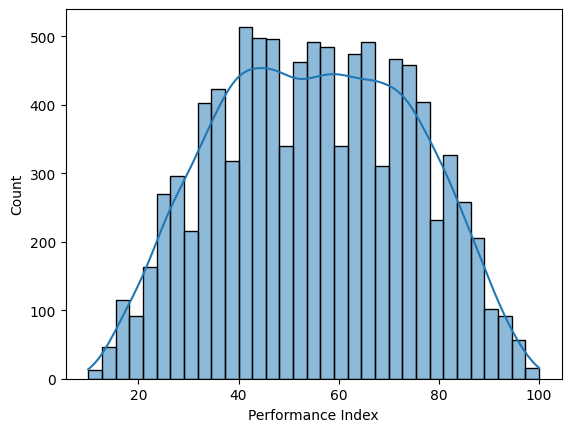

In [ ]:
# Distribución del índice de desempeño

sns.histplot(data= df, x='Performance Index', kde=True)


<Axes: xlabel='Extracurricular Activities', ylabel='count'>

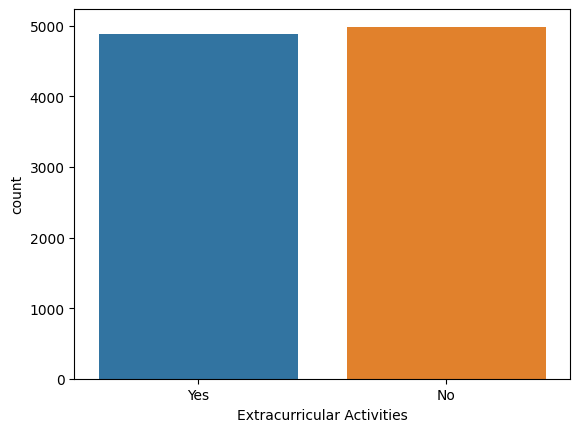

In [44]:
# Cuántos estudiantes realizan actividades extracurriculares
sns.countplot(data= df, x=df['Extracurricular Activities'], hue=df['Extracurricular Activities'], legend=False)

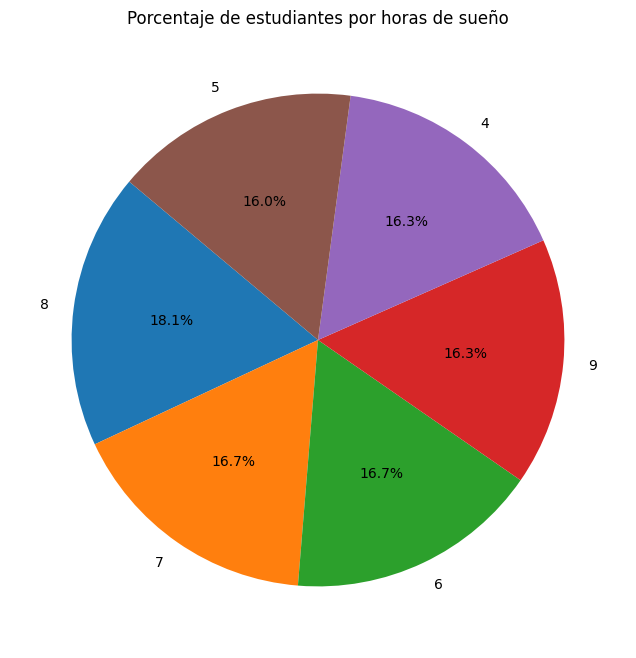

In [ ]:
#Porcentaje de estudiante por hora de sueño
estudiantes_hora_sueño = df['Sleep Hours'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(estudiantes_hora_sueño, labels=estudiantes_hora_sueño.index, autopct = '%1.1f%%', startangle =140)
plt.title('Porcentaje de estudiantes por horas de sueño')
plt.show()

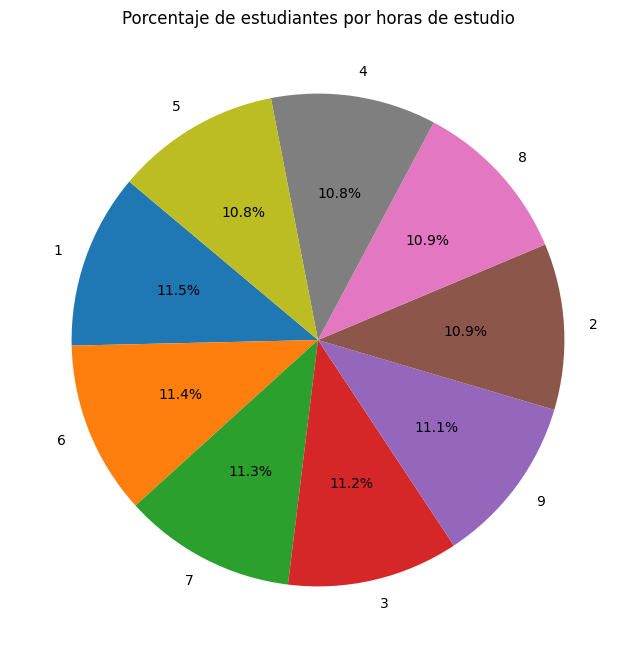

In [ ]:
#Porcentaje de estudiante por hora de estudio
estudiantes_hora_sueño = df['Hours Studied'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(estudiantes_hora_sueño, labels=estudiantes_hora_sueño.index, autopct = '%1.1f%%', startangle =140)
plt.title('Porcentaje de estudiantes por horas de estudio')
plt.show()

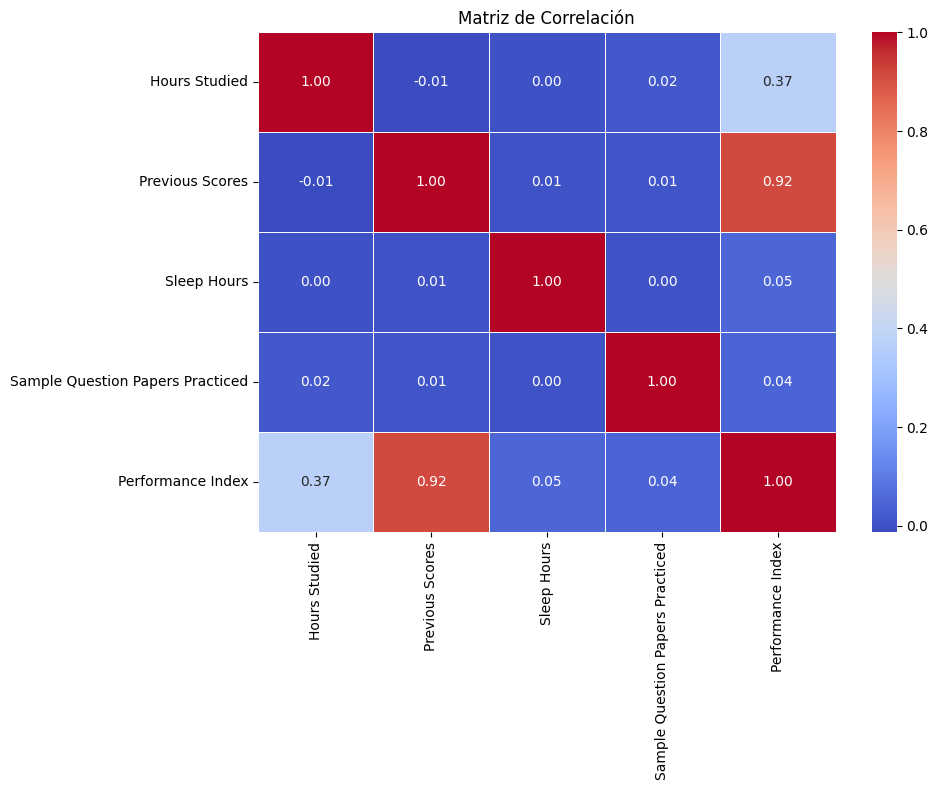

In [ ]:
# Matriz de correlación
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()
